<a href="https://colab.research.google.com/github/GrzegorzPiedel/DataScience-portfolio/blob/main/Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import os
os.listdir()

Saving cancer.csv to cancer.csv


['.config', 'cancer.csv', 'sample_data']

In [ ]:
# Import necessary libraries
import keras
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
keras.utils.set_random_seed(43)
tf.config.experimental.enable_op_determinism()

# Load dataset
dataset = pd.read_csv('cancer.csv')

# Separate features (X) and target (y)
X = dataset.drop(columns=['diagnosis', 'id'], axis=1)
y = dataset['diagnosis']

# Encode target labels ('B' and 'M') into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size = 32,
    epochs=30,
    validation_split=0.1,
    verbose = 1
)

In [ ]:
# Make predictions on the test set
preds = model.predict(X_test).reshape(-1)
preds_binary = (preds > 0.5).astype(int)

# Evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cr = classification_report(y_test, preds_binary, target_names=label_encoder.classes_)
cm = confusion_matrix(y_test, preds_binary)

print(cr)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



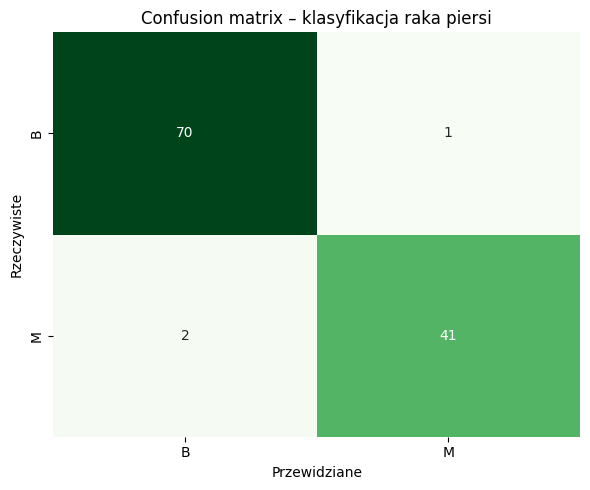

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels,
            cbar=False)

plt.xlabel("Przewidziane")
plt.ylabel("Rzeczywiste")
plt.title("Confusion matrix – klasyfikacja raka piersi")
plt.tight_layout()
plt.show()

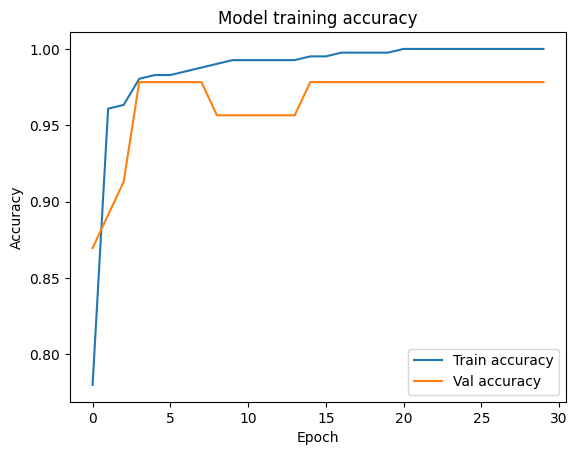

In [ ]:
# Plot training vs validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Val accuracy")
plt.title('Model training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# -----------------------------------------
#Second model with Dropout to reduce overfitting
# -----------------------------------------
import keras
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Reset seed and preprocess data again (optional, for clarity)
keras.utils.set_random_seed(43)
tf.config.experimental.enable_op_determinism()

dataset = pd.read_csv('cancer.csv')

X = dataset.drop(columns=['diagnosis', 'id'], axis=1)
y = dataset['diagnosis']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a neural network with Dropout layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(
    X_train, y_train,
    batch_size = 32,
    epochs=30,
    validation_split=0.1,
    verbose = 1
)

# Predictions and evaluation
preds = model.predict(X_test).reshape(-1)
preds_binary = (preds > 0.5).astype(int)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cr = classification_report(y_test, preds_binary, target_names=label_encoder.classes_)
cm = confusion_matrix(y_test, preds_binary)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



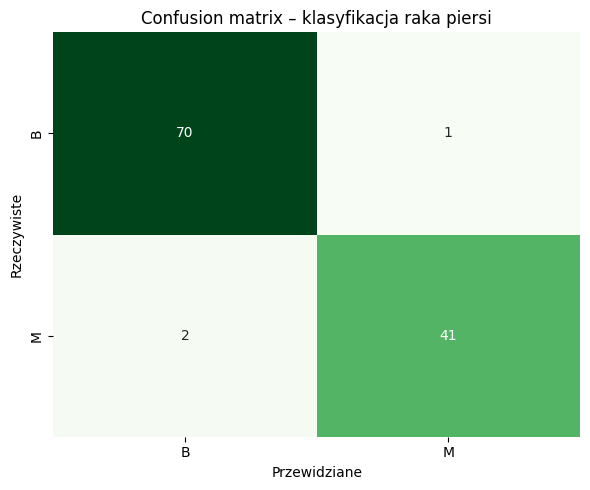

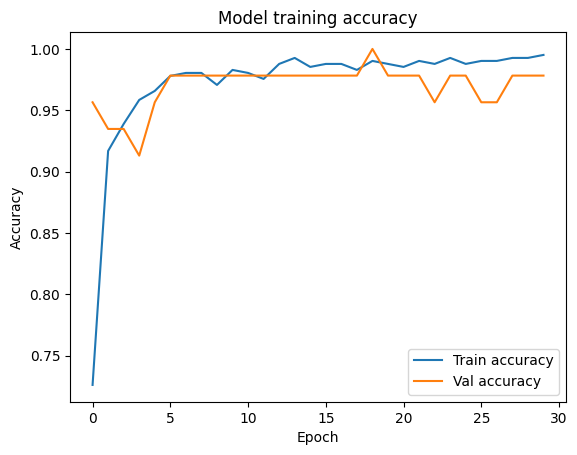

In [ ]:
print(cr)

# Plot confusion matrix
labels = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels,
            cbar=False)

plt.xlabel("Przewidziane")
plt.ylabel("Rzeczywiste")
plt.title("Confusion matrix – klasyfikacja raka piersi")
plt.tight_layout()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label = "Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Val accuracy")
plt.title('Model training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# -----------------------------------------
#SHAP for model interpretability
# -----------------------------------------
import shap

# Explain predictions using SHAP values (first 100 test samples)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test[:100])

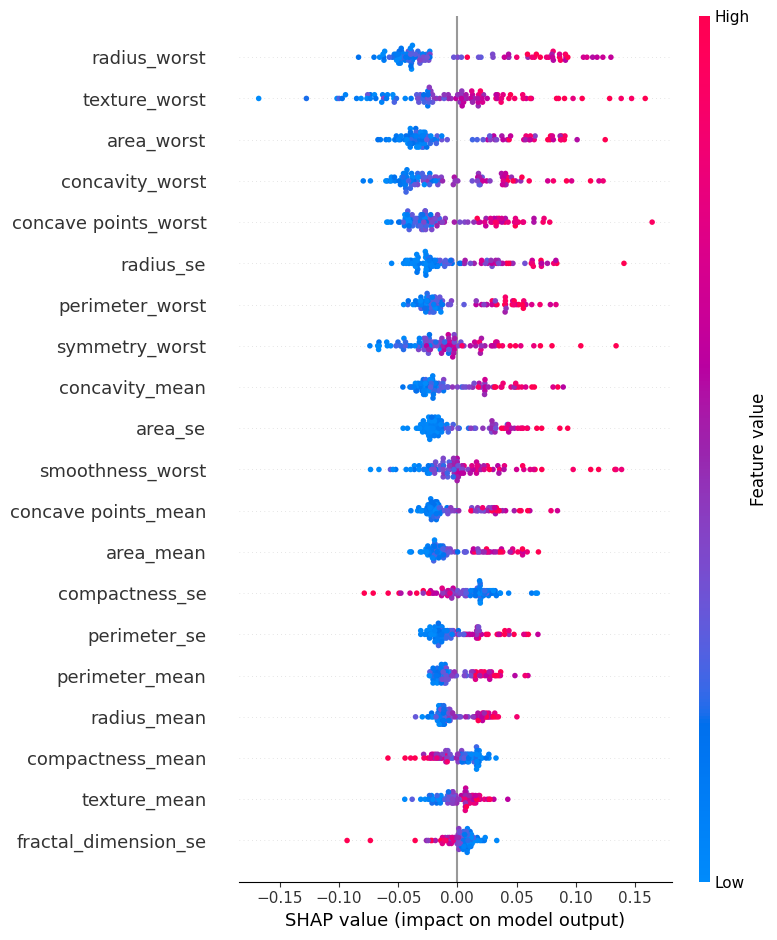

In [ ]:
# Summary plot of feature importance
shap.summary_plot(shap_values, features=X_test[:100], feature_names=X.columns)